c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset Shape: (47849, 6)
  type                                            content  \
0    p  ক্রমণকে পরাস্ত করে, অভাবনীয় দুর্গম, দীর্ঘ পথ ...   
1   ol                            4১ 09৮80, ০০ ০4, 9 133.   
2    p  ১৩ই এপ্রিল (২৬) ১৯১১ সালে কারখান] ডাক্তার ও শি...   
3   li      সুভাবরঞ্জন চক্রবর্তী, পূর্বোক্ত গ্রহ, পৃ 102.   
4    p  অহস্বলাভ করিয়া ভিক্ষু দাসক [ভক্ষ; উপাঁলর হাজা...   

                                               title  \
0  ক্রমণকে পরাস্ত করে, অভাবনীয় দুর্গম, দীর্ঘ পথ ...   
1                            4১ 09৮80, ০০ ০4, 9 133.   
2  ১৩ই এপ্রিল (২৬) ১৯১১ সালে কারখান] ডাক্তার ও শি...   
3      সুভাবরঞ্জন চক্রবর্তী, পূর্বোক্ত গ্রহ, পৃ 102.   
4  অহস্বলাভ করিয়া ভিক্ষু দাসক [ভক্ষ; উপাঁলর হাজা...   

                                             context     label class  
0  ক্রমণকে পরাস্ত করে, অভাবনীয় দুর্গম, দীর্ঘ পথ ...  positive  news  
1                           4১ 09৮80, ০০ ০4, 9 133.।  negative  news  
2  ১৩ই এপ্রিল (২৬) ১৯১১ সালে কারখান] ডাক্তার ও শি...  neg

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 9570/9570 [00:01<00:00, 8703.68 examples/s]
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_259736\1542086343.py:65: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.577600,0.694588,0.824033,0.744538
2,0.527100,0.773534,0.824033,0.744538
3,0.439400,0.535622,0.889655,0.857140


Evaluation results: {'eval_loss': 0.5356224775314331, 'eval_accuracy': 0.8896551724137931, 'eval_f1': 0.8571403938773687, 'eval_runtime': 50.8233, 'eval_samples_per_second': 188.299, 'eval_steps_per_second': 23.552, 'epoch': 3.0}
Classification Report:
               precision    recall  f1-score   support

     history       0.98      0.56      0.71      1139
        news       0.88      1.00      0.94      7886
  philosophy       0.00      0.00      0.00       425
       story       0.00      0.00      0.00        42
   text_book       0.00      0.00      0.00        78

    accuracy                           0.89      9570
   macro avg       0.37      0.31      0.33      9570
weighted avg       0.84      0.89      0.86      9570



c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


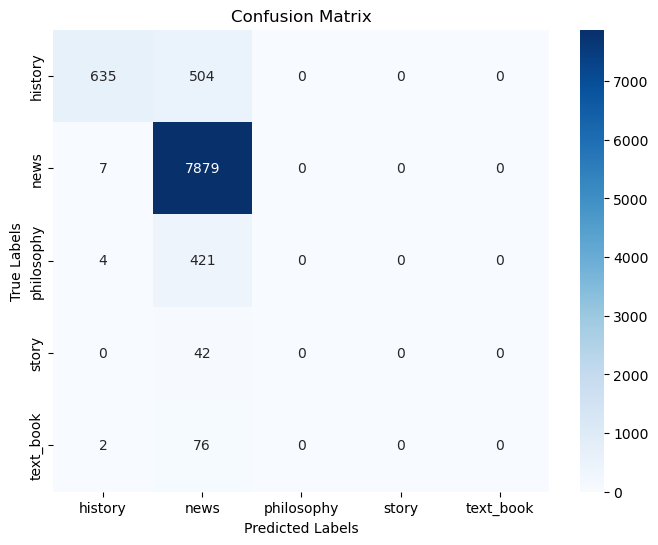

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load dataset
df = pd.read_csv("fdata.csv")
print("Dataset Shape:", df.shape)
print(df.head())

# Check for missing values
df.dropna(inplace=True)

# Shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features and labels
X = df['context']
y = df['class']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert to Hugging Face dataset
data = Dataset.from_pandas(pd.DataFrame({'text': X, 'label': y_encoded}))
data = data.train_test_split(test_size=0.2, seed=42)

# Load model and tokenizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = 'xlm-roberta-base'
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_)).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenization
def tokenize_function(example):
    return tokenizer(example['text'], padding='max_length', truncation=True)

data = data.map(tokenize_function, batched=True)
data = data.remove_columns(['text']).rename_column('label', 'labels')
data.set_format('torch')

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy='epoch',
    load_best_model_at_end=True,
    report_to=[]
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=data['train'],
    eval_dataset=data['test'],
    tokenizer=tokenizer,
    compute_metrics=lambda eval_pred: {
        "accuracy": accuracy_score(eval_pred.label_ids, np.argmax(eval_pred.predictions, axis=-1)),
        "f1": f1_score(eval_pred.label_ids, np.argmax(eval_pred.predictions, axis=-1), average="weighted")
    }
)

# Train model
trainer.train()

# Evaluate model
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)

# Generate predictions
predictions_output = trainer.predict(data['test'])
predictions = np.argmax(predictions_output.predictions, axis=1)
labels = predictions_output.label_ids

# Classification report
report = classification_report(labels, predictions, target_names=le.classes_)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Dataset Shape: (45103, 6)
  type                                            content  \
0    p  ক্রমণকে পরাস্ত করে, অভাবনীয় দুর্গম, দীর্ঘ পথ ...   
1   ol                            4১ 09৮80, ০০ ০4, 9 133.   
2    p  ১৩ই এপ্রিল (২৬) ১৯১১ সালে কারখান] ডাক্তার ও শি...   
3   li      সুভাবরঞ্জন চক্রবর্তী, পূর্বোক্ত গ্রহ, পৃ 102.   
4    p  অহস্বলাভ করিয়া ভিক্ষু দাসক [ভক্ষ; উপাঁলর হাজা...   

                                               title  \
0  ক্রমণকে পরাস্ত করে, অভাবনীয় দুর্গম, দীর্ঘ পথ ...   
1                            4১ 09৮80, ০০ ০4, 9 133.   
2  ১৩ই এপ্রিল (২৬) ১৯১১ সালে কারখান] ডাক্তার ও শি...   
3      সুভাবরঞ্জন চক্রবর্তী, পূর্বোক্ত গ্রহ, পৃ 102.   
4  অহস্বলাভ করিয়া ভিক্ষু দাসক [ভক্ষ; উপাঁলর হাজা...   

                                             context     label class  
0  ক্রমণকে পরাস্ত করে, অভাবনীয় দুর্গম, দীর্ঘ পথ ...  positive  news  
1                           4১ 09৮80, ০০ ০4, 9 133.।  negative  news  
2  ১৩ই এপ্রিল (২৬) ১৯১১ সালে কারখান] ডাক্তার ও শি...  neg

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 9021/9021 [00:01<00:00, 8898.87 examples/s]
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_259736\3715671683.py:65: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.505200,0.370701,0.878173,0.821211
2,0.366200,0.487555,0.878173,0.821211
3,0.099600,0.266272,0.947456,0.941103


Evaluation results: {'eval_loss': 0.26627209782600403, 'eval_accuracy': 0.9474559361489857, 'eval_f1': 0.9411025786383737, 'eval_runtime': 48.3413, 'eval_samples_per_second': 186.611, 'eval_steps_per_second': 23.334, 'epoch': 3.0}
Classification Report:
               precision    recall  f1-score   support

     history       1.00      0.57      0.73      1099
        news       0.94      1.00      0.97      7922

    accuracy                           0.95      9021
   macro avg       0.97      0.79      0.85      9021
weighted avg       0.95      0.95      0.94      9021



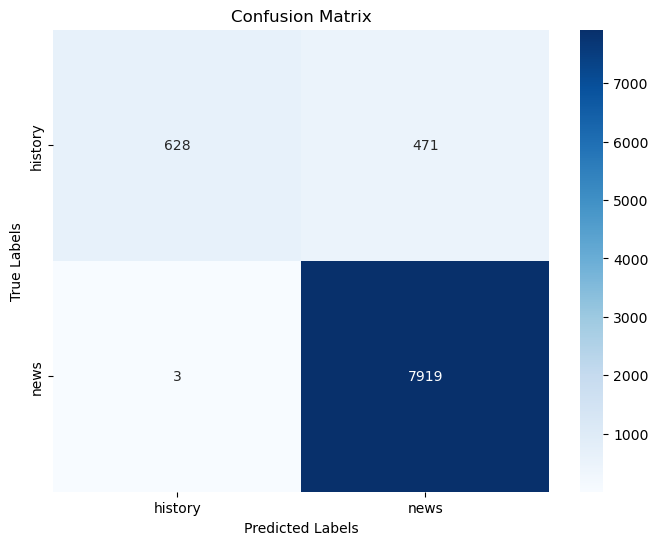

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load dataset
df = pd.read_csv("final.csv")
print("Dataset Shape:", df.shape)
print(df.head())

# Check for missing values
df.dropna(inplace=True)

# Shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features and labels
X = df['context']
y = df['class']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert to Hugging Face dataset
data = Dataset.from_pandas(pd.DataFrame({'text': X, 'label': y_encoded}))
data = data.train_test_split(test_size=0.2, seed=42)

# Load model and tokenizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = 'xlm-roberta-base'
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_)).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenization
def tokenize_function(example):
    return tokenizer(example['text'], padding='max_length', truncation=True)

data = data.map(tokenize_function, batched=True)
data = data.remove_columns(['text']).rename_column('label', 'labels')
data.set_format('torch')

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy='epoch',
    load_best_model_at_end=True,
    report_to=[]
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=data['train'],
    eval_dataset=data['test'],
    tokenizer=tokenizer,
    compute_metrics=lambda eval_pred: {
        "accuracy": accuracy_score(eval_pred.label_ids, np.argmax(eval_pred.predictions, axis=-1)),
        "f1": f1_score(eval_pred.label_ids, np.argmax(eval_pred.predictions, axis=-1), average="weighted")
    }
)

# Train model
trainer.train()

# Evaluate model
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)

# Generate predictions
predictions_output = trainer.predict(data['test'])
predictions = np.argmax(predictions_output.predictions, axis=1)
labels = predictions_output.label_ids

# Classification report
report = classification_report(labels, predictions, target_names=le.classes_)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()